# Proyecto - Etapa 1 - Inteligencia de Negocios
* Sofía Duque Gómez - 201922178
* Nicolás Rueda Rincón - 202013496
* Javier Ramírez Silva - 201821781

## Descripción del caso

La Analítica de Textos (AT) es un campo interdisciplinario que conjuga el aprendizaje de automático (machine learning) y el Procesamiento de Lenguaje Natural, y que tiene como objetivo procesar de manera automática grandes cantidades de textos para la extracción de conocimiento que apoye la toma de decisiones. El proyecto a realizar tiene comentarios de películas en español, que deben ser clasificadas en las categorías de positivo y negativo.

## 0. Objetivos generales y específicos

* ### Objetivo General
    * Fortalecer las competencias necesarias para una aplicación efectiva del proceso de descubrimiento de conocimiento a partir de textos, guiado por una metodología propia del mundo de la analítica.

* ### Objetivos Específicos
    * Aplicar la metodología de analítica de textos para la construcción de soluciones de analítica alineadas con los objetivos del negocio en un contexto de aplicación.
    * Interactuar con un grupo interdisciplinario para validar y mejorar la calidad de la solución analítica planteada.

## 1. Entendimiento del negocio y enfoque analítico
En esta etapa se definirán los objetivos y criterios de éxito desde el punto de vista del negocio. Se determinará el enfoque analítico para alcanzar los objetivos del negocio y se profundizará en cómo el requerimiento de negocio es resuelto por el enfoque analítico propuesto.

| Concepto | Descripción
| ---- | ---- |
| Oportunidad / Problema negocio | El negocio desea desarrollar un modelo que a partir de los datos compartidos de reseñas de películas ensamble el uso de aprendizaje automático y procesamiento del lenguaje natural para procesar grandes cantidades de reseñas y clasificarlas en las categorías de positivo y negativo. El conjunto de datos está compuesto por 5000 entradas, una columna numérica con el id de la reseña ('id') y dos columnas categóricas, la reseña en español ('review_es') y el sentimiento relacionado a esa reseña ('sentimiento').|
| Enfoque analítico | Desde el punto de vista de aprendizaje automático, el requerimiento de este proyecto consiste en el análisis de sentimientos de películas a partir de un conjunto de datos en donde se tiene comentarios de películas en español, los cuales deben ser clasificadas en las categorías de positivo o negativo. Esta clasificación se realiza para determinar la actitud emocional de un texto y de esa manera poder tomar decisiones en base a esa clasificación.|
| Organización y rol dentro de ella que se beneficia con la oportunidad definida | Las organizaciones que se encargan de la realización de las películas, puesto que a partir de la solución a la oportunidad definida les permite saber si las películas que realizaron cuentan con una buena aceptación por parte del público. Además de ello, las organizaciones encargadas del manejo de las reseñas y críticas de las películas podrían desarrollar indicadores de agrado en función de las reseñas en vez de pedirle a los usuarios su puntación en una escala numérica. |
| Técnicas y algoritmos a utilizar | El tipo de aprendizaje a utilizar será supervisado con tareas de aprendizaje de regresión y clasificación. Para la tarea de regresión se van a usar los algoritmos de regresión lineal simple y de regresión logística, por otro lado, para la tarea de clasificación se utilizarán los algoritmos de Naïve Bayes, Support Vector Machines y Random Forest. Lo mencionado anteriormente permite solucionar la problemática planteada por el negocio, debido a que las tareas en conjunto con los algoritmos seleccionados son ideales para realizar análisis de sentimientos permitiendo mediante el procesamiento del lenguaje natural y el análisis de texto la identificación y extracción de la actitud de un interlocutor ante cierto tema, en este caso, películas. |

## 2. Entendimiento y preparación de los datos 

### 2.1. Entendimiento de los datos

En este notebook se abordan dos aspectos importantes para el entendimiento de un conjunto de datos, buscando responder a las necesidades de una empresa en términos de análisis de información:

* 2.1.1. Exploración y perfilamiento de datos
    * 2.1.1.1. Carga
    * 2.1.1.2. Descripción básica
    * 2.1.1.3. Visualización
    * 2.1.1.4. Perfilamiento
<br>
* 2.1.2. Calidad de datos e ideas de preparación
  * 2.1.2.1. Completitud
  * 2.1.2.2. Unicidad / Duplicidad
  * 2.1.2.3. Validez / Estandarizacón

#### Los datos
Se trabaja con un conjunto de datos de información de reseñas de películas en español junto con el sentimiento asociado a esa reseña. El conjunto de datos original contiene 5000 entradas de datos de la información previamente mencionada. 

#### Importación de librerías 

Previo a el entendimiento de los datos, se hace necesario importar las librerías y herramientas necesarias para desarrollar el caso de uso.

In [1]:
!pip install pandas-profiling==2.7.1

In [2]:
!pip install langdetect

In [3]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns; sns.set()
import nltk
import re, string, unicodedata

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem.snowball import SpanishStemmer

from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_classification

import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import tree
import pickle
from langdetect import detect

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/javierramirez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/javierramirez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/javierramirez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 200) # Numero máximo de filas a mostar

### 2.1.1. Exploración y Perfilamiento de datos

#### 2.1.1.1. Carga de los datos
* La carga de los datos se realiza desde de un archivo CSV y se almacena en una estructuras de datos de Pandas conocida como dataframe.
* Se utiliza encoding ISO-8859-1 con el fin de poder importar los datos con tíldes y otras estructuras propias del idioma español.
* El separador del archivo de los datos es ','.

In [8]:
df = pd.read_csv('./MovieReviews.csv', encoding = "ISO-8859-1", sep = ',')
# Se elimina las columnas 'Unnamed' que pueden surgir en ciertas ocasiones
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#### 2.1.1.2. Descripción básica

In [9]:
# Dimensiones del dataframe
df.shape

(5000, 2)

En primera instancia se quiere entender los datos que proporciona la empresa. Por esto se les solicita que se entregue el diccionario de datos y en base a los datos y el diccionario se tiene buena información para comenzar. El conjunto de datos está compuesto por 5000 entradas, una columna numérica con el id de la reseña ('id') y dos columnas categóricas, la reseña en español ('review_es') y el sentimiento relacionado a esa reseña ('sentimiento') que puede ser positivo o negativo.

A continuación se previsualiza una muestra aleatoria de los datos:

In [10]:
# Impresión de algunos registros del dataframe
df.sample(5) # Muestra aleatoria
# df.head(5) # Primeras Filas
# df.tail(5) # Ultimas Filas

,review_es,sentimiento
1880,If you want just about everything you want to ...,positivo
3286,Why do I hate this? Let me list the ways:I hav...,negativo
4232,Ho hum.Solo otro movimiento con Steven Seagal ...,negativo
4521,Pobre Diane Arbus (quienquiera que ella fuera)...,negativo
1103,Escribo esto después de ver la última transmis...,positivo


#### Columnas numéricas
Las columnas numéricas del conjunto de datos son:

| Variable | Tipo | Descripcion | Valores posibles
| --- | --- | --- | --- |
| id | Numérica | Identificador de la reseña | Enteros positivos (int) |

#### Columnas categóricas
Las columnas categóricas del conjunto de datos son:

| Variable | Tipo | Descripcion | Valores posibles
| --- | --- | --- | --- |
| review_es | Categórica | Revisión en español | texto |
| sentimiento | Categórica | Sentimiento asociado a la película | {positivo, negativo} |

#### 2.1.1.3. Visualización

Vemos la distribución de los sentimientos asociados a las reseñas:

<Axes: >

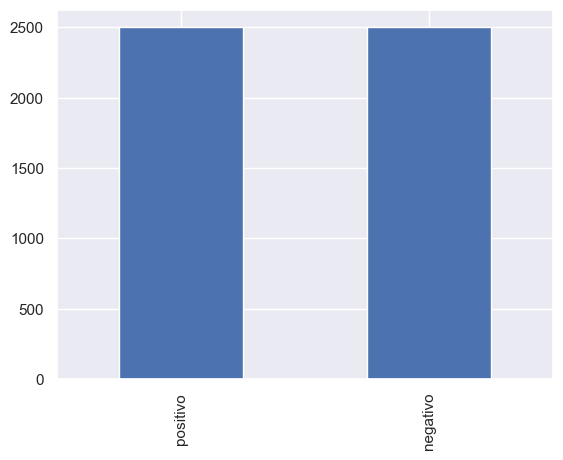

In [11]:
df["sentimiento"].value_counts().plot(kind='bar')

Vemos que existen el mismo número de reseñas con sentimientos negativos y positivos asociados.

#### 2.1.1.4. Perfilamiento
A continuación se presenta el tipo de dato asociado a cada columna del set de datos junto con su cuenta de no-nulos:

In [12]:
# Impresión del tipo de dato asociado a cada columna y su cuenta de no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_es    5000 non-null   object
 1   sentimiento  5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


Vemos que los tipos de datos son correctos y que todas las entradas son no-nulas.

Calculamos las estadísticas principales de las columnas categóricas.

In [13]:
df.describe()

,review_es,sentimiento
count,5000,5000
unique,4998,2
top,"Después de ver a Meredith en ""Más allá de la p...",positivo
freq,2,2500


* En el caso de la columna 'review_es' se observa que de las 5000 entradas, 4998 son únicas, por lo cual se deben eliminar las reseñas repetidas. Además de ello, en la preparación de los datos se debe asegurar que todas las reseñas sean en español.
* Vemos que no existen problemas de conformidad en la variable sentimiento, ya que como se puede evidenciar con el .describe() y con el gráfico de barras con la distribución de valores de esta columna, los únicos valores son positivo y negativo.

### 2.1.2. Calidad de datos e ideas de preparación

#### 2.1.2.1. Completitud
Verificamos que no haya ausencias en el conjunto de datos.

In [14]:
# ¿Hay ausencias?
df.isna().sum()/len(df)

review_es      0.0
sentimiento    0.0
dtype: float64

Verificamos que no hay ausencias en las columnas del conjunto de datos, por lo que se verificó la completitud de los mismos.

#### 2.1.2.2. Unicidad / Duplicidad

Para la verificación de unicidad de los datos, localizaremos las entradas duplicadas en la columna 'review_es'.

Revisamos si hay valores duplicados:

In [15]:
df['review_es'].describe()

count                                                  5000
unique                                                 4998
top       Después de ver a Meredith en "Más allá de la p...
freq                                                      2
Name: review_es, dtype: object

Vemos que existen 4998 valores únicos y vemos que la frecuencia de unos de los valores repetidos es 2, por lo cual concluimos que dos reseñas se encuentran repetidas con una frecuencia de 2 cada una. Esto se corregirá en la etapa de preparación de los datos.

#### 2.1.2.3. Validez / Estandarización

Revisamos la validez de los valores en las columnas:

In [16]:
df['sentimiento'].describe()

count         5000
unique           2
top       positivo
freq          2500
Name: sentimiento, dtype: object

Vemos que no existen problemas de conformidad en la variable sentimiento, ya que los únicos valores son positivo y negativo.

In [17]:
df['review_es'].describe()

count                                                  5000
unique                                                 4998
top       Después de ver a Meredith en "Más allá de la p...
freq                                                      2
Name: review_es, dtype: object

Debemos profundizar más en la columna 'review_es', verificando que todas las reseñas sean en español. Para ello utilizaremos langdetect, añadiendo una nueva columna al dataframe con el lenguaje detectado para la reseña, y posteriormente verificaremos estos valores.

In [18]:
def detect_language(text):
    try:
        lang = detect(text)
    except:
        lang = 'unknown'
    return lang

In [19]:
df['language'] = df['review_es'].apply(detect_language)

In [20]:
df["language"].describe()

count     5000
unique       3
top         es
freq      4803
Name: language, dtype: object

<Axes: >

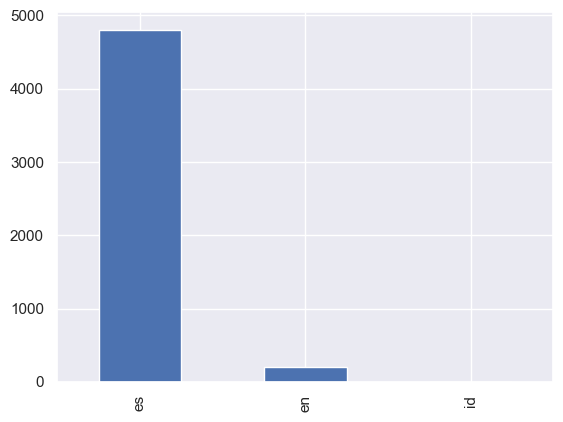

In [21]:
df["language"].value_counts().plot(kind='bar')

Vemos que existen reseñas en dos lenguajes diferentes al español, con códigos 'en' y 'id' esto se corregirá en la etapa de preparación de los datos, eliminando los registros cuyo idioma sea diferente al español.

### 2.2. Preparación de los datos

#### 2.2.1. Corrección de calidad de datos

Corregimos el problema de unicidad descrito anteriormente, manteniendo únicamente la primera entrada cuando se presentan reseñas duplicadas:

In [22]:
# Encontramos los valores duplicados en la columna 'review_es'
duplicated_rows = df[df.duplicated(subset=['review_es'])]

# Eliminamos las filas con duplicados (se mantiene solo la primera entrada única)
df = df.drop_duplicates(subset=['review_es'])

Volvemos a verificar la unicidad:

In [23]:
df['review_es'].describe()

count                                                  4998
unique                                                 4998
top       Si está buscando una película de guerra típica...
freq                                                      1
Name: review_es, dtype: object

Vemos que quedamos con 4998 registros y todos son únicos. Así nos aseguramos de la unicidad de los datos.

Corregimos ahora el problema de validez referente al idioma de las reseñas:

In [24]:
# Drop de las filas donde el lenguaje de la reseña no es español
df = df[df['language'] == 'es']

In [25]:
#Verificamos que solo queden reseñas con idioma español
df['language'].describe()

count     4801
unique       1
top         es
freq      4801
Name: language, dtype: object

In [26]:
# Drop de la columna lenguaje ya que no la necesitaremos más.
df = df.drop('language', axis=1)

#### 2.2.2. Definición de funciones de NLP para limpiar datos

In [27]:
# Definimos funciones para limpiar los datos:

def replace_punctuation(review):
    """Replace punctuation with space"""
    return re.sub(r"""
               [,.;@#?!&$]+  # Accept one or more copies of punctuation
               \ *           # plus zero or more copies of a space,
               """,
               " ",          # and replace it with a single space
               review, flags=re.VERBOSE)

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_words.append(word.lower())
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    stop_words = set(stopwords.words('spanish'))
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def replace_spanish_words(words):
    """Cambiar palabras tildadas por sus equivalentes sin tildes"""
    new_words = []
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for word in words:
        new_word = word
        for a, b in replacements:
            new_word = new_word.replace(a, b).replace(a.upper(), b.upper())
        new_words.append(new_word)
    return new_words
    
def preprocessing(words):
    words = to_lowercase(words)
    # No se utiliza replace_numbers debido a su falta de compatibilidad con el español
    # words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = replace_spanish_words(words)
    return words

#### 2.2.3 Tokenización
La tokenización permite dividir frases u oraciones en palabras. Con el fin de desglozar las palabras correctamente para el posterior análisis. A continuación se tokeniza cada reseña y se aplica el preprocessing definido anteriormente.

In [28]:
df['words'] = df['review_es'].apply(replace_punctuation).apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido

In [29]:
df.sample(20)

,review_es,sentimiento,words
2292,"es genial, me encantó, porque amo los dinosaur...",positivo,"[genial, encanto, amo, dinosaurios, animales, ..."
554,La película de David Lynch's (1999) de John Ro...,positivo,"[pelicula, david, lynch, s, 1999, john, roach,..."
886,"En la película de Christian Duguay, Hitler: el...",positivo,"[pelicula, christian, duguay, hitler, auge, ma..."
3432,"Si le gustaba a William Hickey en ""El honor de...",negativo,"[si, gustaba, william, hickey, honor, prizzi, ..."
3364,Aquí hay una revisión para personas como yo. E...,negativo,"[aqui, revision, personas, pelicula, chupa, pr..."
2550,Tengo esto en la maldición de DVD 10 Pack de l...,negativo,"[maldicion, dvd, 10, pack, muertos, amar, paqu..."
1370,Una comedia que funcionó sorprendentemente bie...,positivo,"[comedia, funciono, sorprendentemente, bien, p..."
4024,¡Esta es una película extremadamente tonta y p...,negativo,"[pelicula, extremadamente, tonta, pequeña, esc..."
3670,Qué bomba atómica de una película.La historia ...,negativo,"[bomba, atomica, pelicula, historia, va, ningu..."
2239,"Claro, se volvió rápidamente desigual después ...",positivo,"[claro, volvio, rapidamente, desigual, despues..."


#### 2.2.4 Preparación para algoritmos

Mapearemos valores de la variable objetivo sentimiento a números, negativo como 0 y positivo como 1, para así poder aplicar con mayor facilidad los algoritmos a utilizar.

In [30]:
df['sentimiento'] = df['sentimiento'].replace({'negativo': 0, 'positivo': 1})

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4801 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_es    4801 non-null   object
 1   sentimiento  4801 non-null   int64 
 2   words        4801 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.0+ KB


#### 2.2.4.1. Selección de campos

In [32]:
df['words'] = df['words'].apply(lambda x: ' '.join(map(str, x)))
df

,review_es,sentimiento,words
0,Si está buscando una película de guerra típica...,1,si buscando pelicula guerra tipica asi nota af...
1,Supongo que algunos directores de películas de...,1,supongo directores peliculas lujo sentados bus...
2,Es difícil contarle más sobre esta película si...,1,dificil contarle pelicula estropearla disfrute...
3,"La película comienza muy lentamente, con el es...",1,pelicula comienza lentamente estilo vida walla...
4,Esta película es verdadera acción en su máxima...,1,pelicula verdadera accion maxima expresion mej...
...,...,...,...
4994,Las bonitas visuales y muchas peleas no hacen ...,0,bonitas visuales muchas peleas hacen buena pel...
4995,"""Criminal decente ordinario"" es triste porque ...",0,criminal decente ordinario triste obviamente t...
4996,Savage Island (2003) es una película coja.Es m...,0,savage island 2003 pelicula coja video video c...
4997,Quien escribió el script para esta película no...,0,escribio script pelicula merece trabajar holly...


Separar conjunto de entrenamiento con conjunto de prueba 70%-30%

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df['words'], df['sentimiento'], test_size = 0.3, random_state = 1)

## 3. Modelado y evaluación

### 3.1. Algoritmo de Regresión Lineal Simple

In [34]:
text_lr = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('lr', LinearRegression()), ])

In [35]:
text_lr.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('lr', LinearRegression())])

In [36]:
print('MAE:')
print('Train:', mean_absolute_error(y_train, text_lr.predict(X_train)))
print('Test:', mean_absolute_error(y_test, text_lr.predict(X_test)))
print('\nRMSE:')
print('Train:', np.sqrt(mean_squared_error(y_train, text_lr.predict(X_train))))
print('Test:', np.sqrt(mean_squared_error(y_test, text_lr.predict(X_test))))
print('\nR²:')
lr_score_train = r2_score(y_train, text_lr.predict(X_train))
lr_score_test = r2_score(y_test, text_lr.predict(X_test))
print('Train:', lr_score_train)
print('Test:', lr_score_test)

MAE:
Train: 3.3839774946538447e-06
Test: 0.30641680009746325

RMSE:
Train: 4.693357597879289e-06
Test: 0.37247501439124164

R²:
Train: 0.9999999999118885
Test: 0.44493156999504613


### 3.2. Algoritmo de Regresión Logística

In [37]:
text_logr = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('logr', LogisticRegression()), ])

In [38]:
text_logr.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('logr', LogisticRegression())])

In [39]:
print('MAE:')
print('Train:', mean_absolute_error(y_train, text_logr.predict(X_train)))
print('Test:', mean_absolute_error(y_test, text_logr.predict(X_test)))
print('\nRMSE:')
print('Train:', np.sqrt(mean_squared_error(y_train, text_logr.predict(X_train))))
print('Test:', np.sqrt(mean_squared_error(y_test, text_logr.predict(X_test))))
print('\nR²:')
logr_score_train = r2_score(y_train, text_logr.predict(X_train))
logr_score_test = r2_score(y_test, text_logr.predict(X_test))
print('Train:', logr_score_train)
print('Test:', logr_score_test)

MAE:
Train: 0.030357142857142857
Test: 0.14226231783483692

RMSE:
Train: 0.1742330131092924
Test: 0.37717677266082666

R²:
Train: 0.8785698797178535
Test: 0.43082984913585476


### 3.3. Algoritmo de Naïve Bayes

In [40]:
text_nv = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('nv', MultinomialNB()), ])

In [41]:
text_nv.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('nv', MultinomialNB())])

In [42]:
nv_score_train = text_nv.score(X_train, y_train)

In [43]:
nv_score_test = text_nv.score(X_test, y_test)

In [44]:
print('Score:')
print('Train:', nv_score_train)
print('Test:', nv_score_test)

Score:
Train: 0.9797619047619047
Test: 0.8362248438584317


In [45]:
docs_new = ['excelente pelicula', 'muy mala']
predicted = text_nv.predict(docs_new)
print(predicted)

[1 0]


### 3.4. Algoritmo de Support Vector Machines (SVM)

In [46]:
text_svm = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svm', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)) ])

In [47]:
text_svm.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('svm',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [48]:
svm_score_train = text_svm.score(X_train, y_train)

In [49]:
svm_score_test = text_svm.score(X_test, y_test)

In [50]:
print('Score:')
print('Train:', svm_score_train)
print('Test:', svm_score_test)

Score:
Train: 0.9380952380952381
Test: 0.8396946564885496


### 3.5. Algoritmo de Random Forrest

In [51]:
text_rf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('rf', RandomForestClassifier()), ])

In [52]:
text_rf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('rf', RandomForestClassifier())])

In [53]:
rf_score_train = text_rf.score(X_train, y_train)

In [54]:
rf_score_test = text_rf.score(X_test, y_test)

In [55]:
print('Score:')
print('Train:', rf_score_train)
print('Test:', rf_score_test)

Score:
Train: 1.0
Test: 0.8195697432338653


### 3.2. Evaluación de los modelos obtenidos

#### 3.2.1. Algoritmos de Regresión (Lineal y Logística)
Para el algoritmo de Regresión Lineal Simple obtuvimos para el conjunto de datos de entrenamiento un R² de 0.9999 y para el conjunto de datos de prueba uno de 0.4449. Mientras que para el algoritmo de Regresión Logística obtuvimos para el conjunto de datos de entrenamiento un R² de 0.8785 y para el conjunto de datos de prueba uno de 0.4308. Podemos evidenciar que hay una gran diferencia en el indicador de ambos conjuntos de datos y el rendimiento objetivo de las pruebas no es satisfactorio. Por lo tanto el modelo está sobre ajustado, lo cual se debe a que el modelo está tan ajustado al conjunto de datos de entrenamiento que al momento de generalizar con los datos de prueba no se obtiene el rendimiento esperado. Este algoritmo no fue capaz de obtener patrones de los datos de entrenamiento con el fin de predecir correctamente datos nuevos, es decir, el modelo no es extrapolable a datos de prueba.

#### 3.2.2. Algoritmo de Naïve Bayes
Para el algoritmo de Naïve Bayes obtuvimos un accuracy score de 0.9798 y 0.8362 para los datos de entrenamiento y de prueba, respectivamente. A partir de lo anterior se puede concluir que el modelo tiene un buen rendimiento, debido a que el indicador sobre el conjunto de test está entre los más altos de todos los algoritmos implementados y no hay una gran diferencia entre los indicadores de ambos conjuntos de datos (existe un buen ajuste). Esto se debe a que el tamaño de los datos y la naturaleza del algoritmo son ideales para que el modelo aprenda y pueda extrapolarse de una manera correcta. Adicionalmente, este algoritmo se basa en calcular la probabilidad condicional de que ocurra un evento dado que se sabe que otro evento ha ocurrido.

#### 3.2.3. Algoritmo de Support Vector Machines (SVM)
Para el algoritmo de Support Vector Machines (SVM) obtuvimos un accuracy score de 0.9398 y 0.8396 para los datos de entrenamiento y de prueba, respectivamente. A partir de lo anterior podemos concluir que este algoritmo es el que mejor rendimiento tiene de los 5 realizados. La diferencia entre el indicador en los datos de entrenamiento y el de los datos de prueba es muy pequeña, lo cual se debe a que este algoritmo optimiza las entradas para maximizar los resultados de la solución óptima. Adicionalmente, al igual que el algoritmo anterior éste destaca con un conjunto de datos pequeño.

#### 3.2.4. Algoritmo de Random Forest
Para el algoritmo de Random Forest obtuvimos un accuracy score de 1.0 para el conjunto de datos de entrenamiento y de 0.8223 para el de prueba. Este algorítmo, a pesar de contar con un buen rendimiento en cuanto a la exactitud, es posible que el modelo obtenido esté un poco sobreajustado, debido a la diferencia entre los datos de entrenamiento y el de prueba. Dicho esto podemos concluir que este algoritmo funciona muy bien para clasificar nuevas entradas, puesto que combina múltiples árboles de decisión individuales para mejorar la precisión general del modelo. Además, maneja conjunto de datos con diferentes características.

Se procederá a crear una figura con la representación gráfica de los resultados obtenidos para cada algoritmo:

In [56]:
Algorithm = ['Regresión Lineal', 'Regresión Lineal', 'Regresión Logística', 'Regresión Logística', 'Naïve Bayes', 'Naïve Bayes', 'SVM', 'SVM', 'Random Forrest', 'Random Forrest']

In [57]:
Data_Set = ['Train', 'Test', 'Train', 'Test', 'Train', 'Test', 'Train', 'Test', 'Train', 'Test']

In [58]:
Score = [lr_score_train, lr_score_test, logr_score_train, logr_score_test, nv_score_train, nv_score_test, svm_score_train, svm_score_test, rf_score_train, rf_score_test]

In [59]:
l = []
for i in range (0, 10):
    l.append([Algorithm[i], Data_Set[i], Score[i]])

In [60]:
df = pd.DataFrame(l, columns=['Algorithm', 'Data_Set', 'Score'])


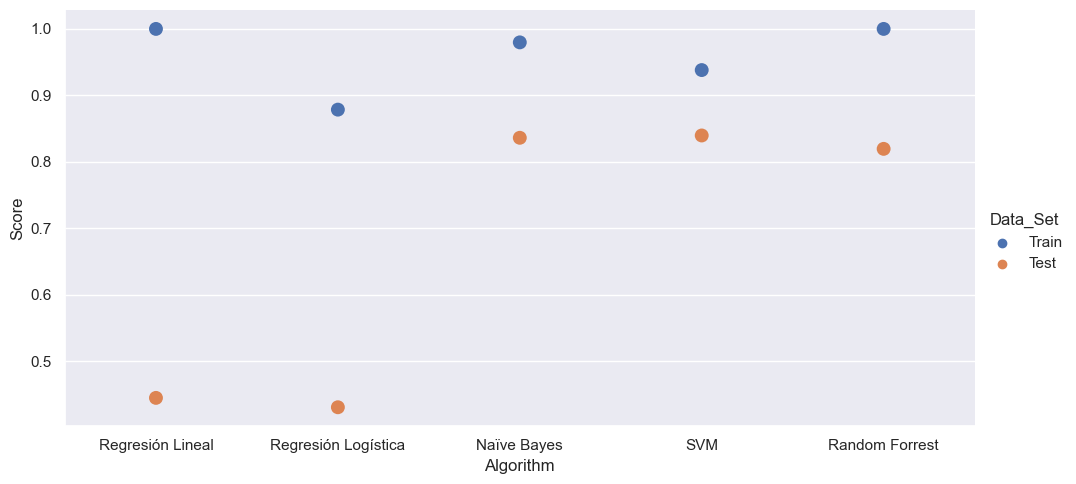

In [61]:
sns.catplot(data=df, x='Algorithm', y='Score', hue='Data_Set', kind="swarm", height=5, aspect=10/5, s = 100)

Como se observa en la figura, mientras que los algoritmos de regresión cuentan con una diferencia significativa entre los datos de prueba y de test (sobreajuste) y un score significativamente bajo (baja exactitud), los algoritmos de clasificación, cuentan con un buen nivel de ajuste y una exactitud similar. El algoritmo de Support Vector Machines es el que cuenta con un mejor ajuste y una mayor exactitud, por esta razón se recomienda el uso de este algoritmo bajo las condiciones actuales del proyecto y los datos.

### 4. Conclusiones

En conclusión, en cuanto a los algoritmos de regresión podemos decir que no son los más adecuados para darle solución a la problemática planteada, puesto que no son generalizables a los datos de prueba. Esto se debe a que, estos modelos se ajustan mucho a los datos iniciales, basándose en tendencias no generales, que a la hora de predecir con nuevos datos no podrán relacionarlos por lo que su predicción se basa en patrones no generalizados del conjunto de entrenamiento y es incapaz de extrapolar al conjunto de prueba.

Ahora bien, podemos concluir que el mejor algoritmo para la problemática planteada es el de Support Vector Machines (SVM), debido a que en él se optimizan las entradas para poder maximizar los resultados de la solución óptima y es el que presenta el mejor nivel de ajuste entre los datos de prueba y de entrenamiento. En la implementación de estr algoritmo, el modelo encuentra patrones generalizables a todo el conjunto de datos por lo cual la exactitud es la mayor entre los modelos implementados. 

A partir de la utilización del modelo obtenido con este algoritmo, las organizaciones relacionadas con la industria cinematográfica podrán cuantificar y generar valor a partir de uno de los elementos más significativos de esta industria: las reseñas. El modelo obtenido contó con excelentes métricas de rendimiento y ajuste, convirtiéndolo en una oportunidad inigualable para apoyar decisiones futuras del negocio, tales como recomendaciones de material cinematográfico personalizadas y el desarrollo de material perfilado a los clientes.
